In [65]:
import pandas as pd
df = pd.read_csv('https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Online%20News%20Popularity/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Understanding the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

Its given in the dataset that url and timedelta are non predictive so we will drop these columns as they will be of no use for analysis

In [4]:
df.drop(columns= ['url', ' timedelta'], inplace=True)

In [ ]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Data Cleaning

In [ ]:
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [ ]:
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [66]:
df.columns=df.columns.str.replace(" ","")

We can seperate out weekdays and data channel columns , they are categorical data which is present as boolean values in the dataset.

In [4]:
cat_columns = ["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]

df_num = df.drop(columns= cat_columns)
df_cat = df[cat_columns]

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                39644 non-null  float64
 1   n_tokens_content              39644 non-null  float64
 2   n_unique_tokens               39644 non-null  float64
 3   n_non_stop_words              39644 non-null  float64
 4   n_non_stop_unique_tokens      39644 non-null  float64
 5   num_hrefs                     39644 non-null  float64
 6   num_self_hrefs                39644 non-null  float64
 7   num_imgs                      39644 non-null  float64
 8   num_videos                    39644 non-null  float64
 9   average_token_length          39644 non-null  float64
 10  num_keywords                  39644 non-null  float64
 11  kw_min_min                    39644 non-null  float64
 12  kw_max_min                    39644 non-null  float64
 13  k

#EDA

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-28-82e7c55e100a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-28-82e7c55e100a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),mask=mask)


<Axes: >

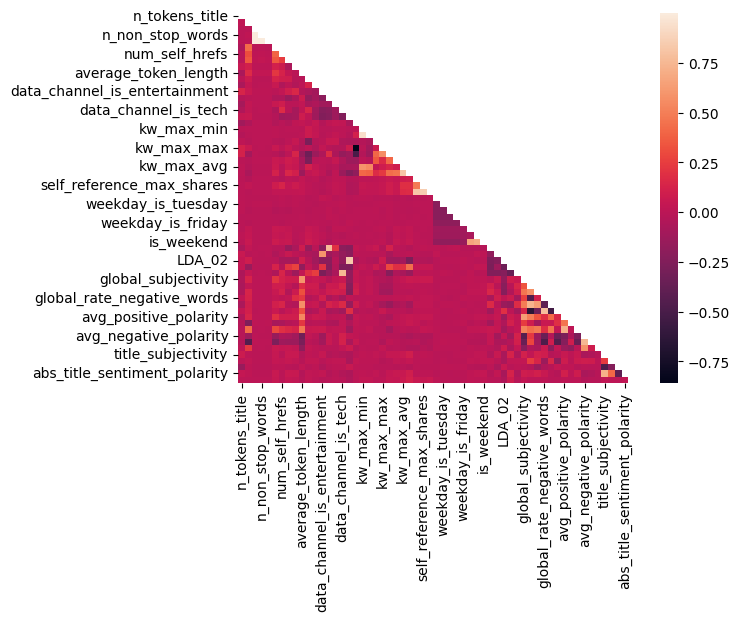

In [28]:
mask = np.triu(np.ones_like(df.corr()))
sn.heatmap(df.corr(),mask=mask)

In [67]:
a=df['shares'].mean()
df['popul'] = df['shares'].apply(lambda x: 'Pop' if x <1400 else 'Unpop')

<Axes: xlabel='n_tokens_title', ylabel='Count'>

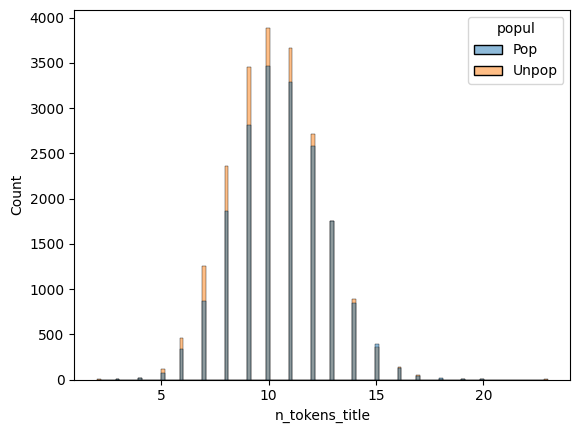

In [ ]:
sn.histplot(data= df,x='n_tokens_title', hue='popul')

<Axes: xlabel='n_tokens_content', ylabel='Count'>

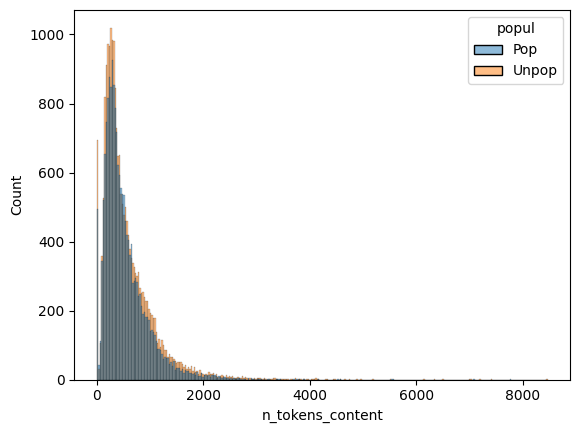

In [ ]:
sn.histplot(data= df,x='n_tokens_content', hue='popul')

<Axes: xlabel='n_tokens_title', ylabel='shares'>

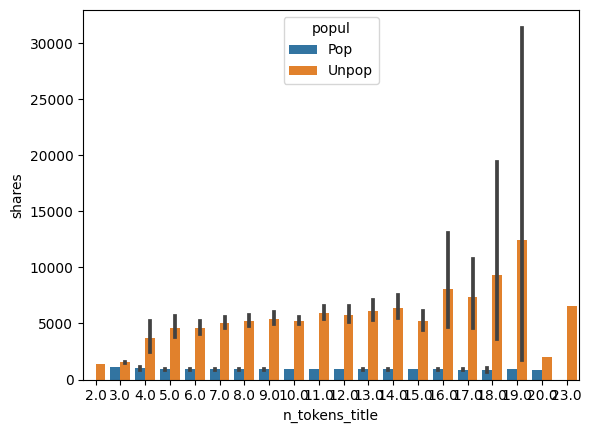

In [ ]:
sn.barplot(x='n_tokens_title',y='shares', data=df, hue='popul')

<Axes: xlabel='num_keywords', ylabel='shares'>

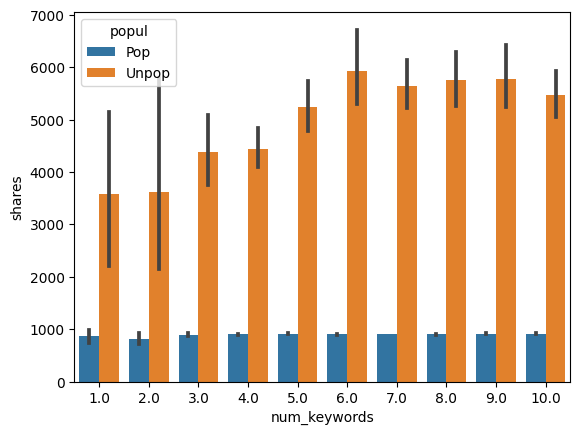

In [ ]:
sn.barplot(x='num_keywords',y='shares', data=df, hue='popul')

In [73]:
Weekday = df.columns.values[31:39]
Weekday

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend'], dtype=object)

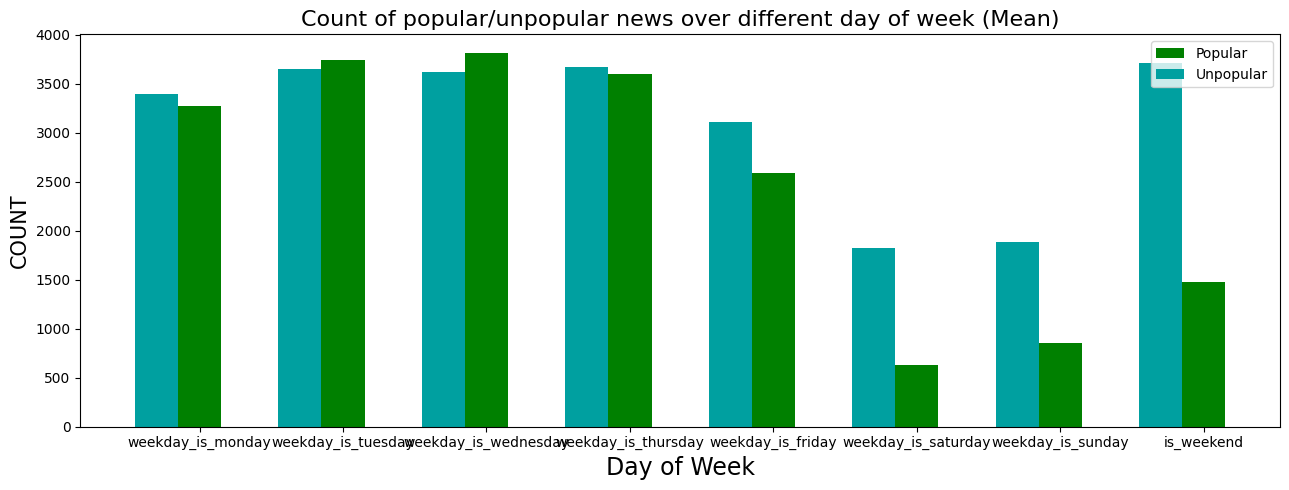

In [75]:
Pop = df[df['popul']=='Pop']
Unpop=df[df['popul']=='Unpop']

Unpop_day = Unpop[Weekday].sum().values
Pop_day = Pop[Weekday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Weekday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Weekday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Weekday)),Weekday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

MODELING

In [63]:
modelscore=[]
X=df.drop(['popul','shares'],axis=1)
y=df['shares']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.linear_model import LinearRegression
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score

LINEAR **REGRESSION**

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable
#y, X = dmatrices('rating ~ points+assists+rebounds', data=df_num, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['variable'] = X_train.columns


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [67]:
imp_cols = vif[(vif['VIF']<10) & (vif['VIF']>5)]['variable'].to_list() + cat_columns

In [68]:
X_train1 = X_train[imp_cols]
X_test1 = X_test[imp_cols]

In [70]:
regr = LinearRegression()
regr.fit(X_train1, y_train)
print(regr.score(X_test1, y_test))

0.020576574862551822


In [34]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from xgboost import XGBRegressor

# create regressor object
regressor = XGBRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [35]:
pred = regressor.predict(X_test)

In [36]:
X_train

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
8002,9.0,645.0,0.523659,1.0,0.705722,9.0,4.0,1.0,0.0,4.860465,...,0.309127,0.033333,0.8,-0.249653,-0.4,-0.125,0.066667,0.033333,0.433333,0.033333
3977,11.0,2104.0,0.376261,1.0,0.557325,25.0,3.0,11.0,0.0,4.687738,...,0.359387,0.100000,1.0,-0.275221,-0.8,-0.050,0.100000,0.000000,0.400000,0.000000
32942,10.0,540.0,0.580786,1.0,0.649852,30.0,2.0,1.0,0.0,4.437037,...,0.437879,0.033333,0.8,-0.300000,-0.8,-0.050,0.900000,0.500000,0.400000,0.500000
33249,10.0,711.0,0.530670,1.0,0.668113,21.0,7.0,2.0,0.0,4.991561,...,0.347114,0.033333,0.8,-0.251282,-0.5,-0.050,0.100000,0.200000,0.400000,0.200000
29990,13.0,796.0,0.473418,1.0,0.624242,12.0,0.0,1.0,0.0,4.821608,...,0.274426,0.100000,0.6,-0.194753,-0.6,-0.050,0.400000,0.100000,0.100000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,12.0,1555.0,0.398579,1.0,0.602941,20.0,14.0,3.0,0.0,4.846302,...,0.285253,0.033333,1.0,-0.277083,-1.0,-0.100,0.383333,-0.183333,0.116667,0.183333
32103,14.0,1053.0,0.493583,1.0,0.688013,7.0,4.0,0.0,26.0,4.373219,...,0.430118,0.050000,1.0,-0.431391,-1.0,-0.050,0.000000,0.000000,0.500000,0.000000
30403,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000,0.900000,-0.600000,0.400000,0.600000
21243,12.0,625.0,0.529126,1.0,0.716292,9.0,2.0,2.0,0.0,4.316800,...,0.287810,0.033333,0.8,-0.215432,-0.4,-0.100,0.200000,0.100000,0.300000,0.100000


In [83]:
from sklearn import metrics
import numpy as np

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("R²:",-metrics.r2_score(y_test, pred))


RMSE: 9567.396097286297
MAE: 3335.424141945161
R²: 0.20275815738106906


In [38]:
regressor.feature_importances_

array([0.01516081, 0.01649372, 0.05503239, 0.        , 0.00785416,
       0.03013792, 0.01088034, 0.00689838, 0.00659272, 0.05278842,
       0.07595021, 0.01954705, 0.00388955, 0.09600545, 0.00277416,
       0.00393186, 0.0027091 , 0.03435406, 0.02190706, 0.03311069,
       0.00738578, 0.01401787, 0.01943608, 0.00980056, 0.01185527,
       0.02399796, 0.01425579, 0.01244859, 0.01545592, 0.00731516,
       0.01954094, 0.00311818, 0.0098708 , 0.00652883, 0.01616653,
       0.00176454, 0.00479093, 0.01313223, 0.01304729, 0.01116701,
       0.0101072 , 0.00782363, 0.01364547, 0.00712124, 0.02301474,
       0.00563448, 0.00348661, 0.00497752, 0.01143762, 0.00422183,
       0.00426392, 0.01888115, 0.00213399, 0.00660971, 0.1192963 ,
       0.01737062, 0.00552053, 0.00333913], dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

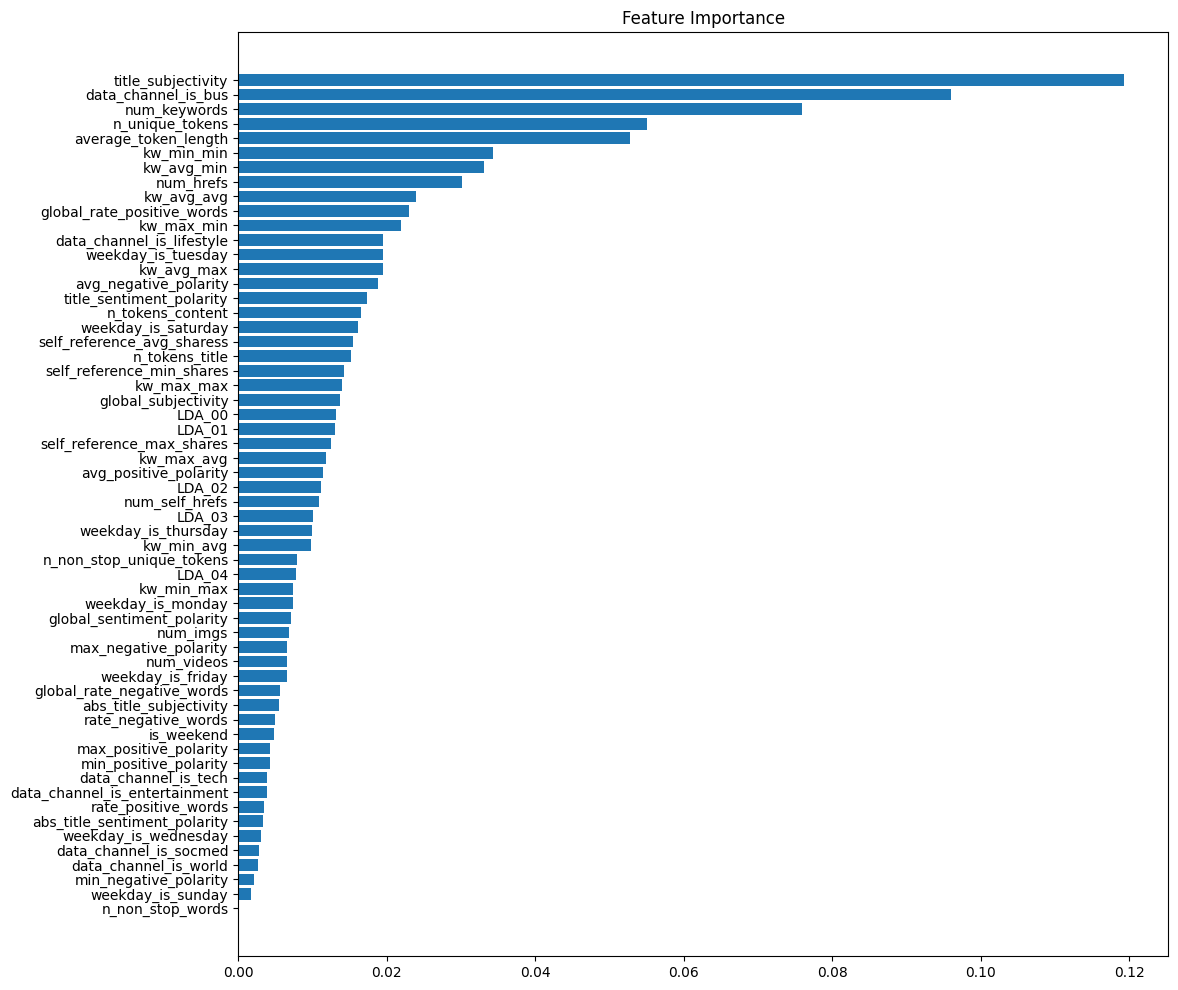

In [42]:

feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [47]:
idx = sorted_idx[:12].tolist()

rem_col  = []
for i in idx:
  rem_col.append(df.columns[i])

In [50]:
X_train0 = X_train[rem_col]
X_test0 = X_test[rem_col]
regressor0 = XGBRegressor(n_estimators=100,
                                  random_state=0)
regressor0.fit(X_train0, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [52]:
pred0 = regressor0.predict(X_test0)

In [60]:
from sklearn import metrics
import numpy as np
print("MSE:",metrics.mean_squared_error(y_test, pred0))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred0)))
print("MAE:",metrics.mean_absolute_error(y_test, pred0))
print("R²:",metrics.r2_score(y_test, pred0))
print("Adjusted R²:",1 - (1-metrics.r2_score(y_test, pred0))*(len(y_test)-1)/(len(y_test)-X_test0.shape[1]-1))

MSE: 97708511.14962953
RMSE: 9884.76156260886
MAE: 3364.8387060087225
R²: 0.9590957751978519
Adjusted R²: -0.28582259713378044


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [11]:
X=df.drop(['popul','shares'],axis=1)
y=df['shares']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
#Linear Regression
lr_pipeline = Pipeline([
    ('scaler_1', StandardScaler()),
    ('lr_regressor', LinearRegression())
])

#KNN
knn_pipeline = Pipeline([
    ('scaler_2', StandardScaler()),
    ('knn_regressor', KNeighborsRegressor())
])

#XGB
xgb_pipeline = Pipeline([
    ('scaler_3', StandardScaler()),
    ('xgb_regressor', XGBRegressor())
])

#Decision Tree
dt_pipeline = Pipeline([
    ('scaler_4', StandardScaler()),
    ('dt_regressor', DecisionTreeRegressor())
])



pipelines = [lr_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline]
models = ['Linear Regression', 'KNN', 'XGB', 'Decision Tree']

In [14]:
for i in pipelines:
    i.fit(X_train, y_train)
    print('Done')

Done
Done
Done
Done


In [15]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results.append(cv_score)
    print("%s: %f " % (models[i], cv_score.mean()))

Linear Regression: -11154.887863 
KNN: -12296.857259 
XGB: -12723.672039 
Decision Tree: -18680.006904 


In [32]:
pred = xgb_pipeline.predict(X_test)

In [84]:
import numpy as np
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("R²:",metrics.r2_score(y_test, pred))

RMSE: 9567.396097286297
MAE: 3335.424141945161
R²: -0.20275815738106906
